# __Predicción de Churn__

## __1. Introducción__

En la industria de las telecomunicaciones, la retención de clientes es un desafío clave para las empresas, ya que la fuga de clientes (o `churn`) puede tener un impacto negativo significativo en los ingresos y la reputación de la organización. Los clientes que abandonan sus servicios representan pérdidas directas para la empresa y, en mercados competitivos, atraer nuevos clientes puede ser más costoso que retener a los existentes. Por ello, anticiparse a la fuga de clientes se ha convertido en una prioridad estratégica.

El objetivo de este proyecto es desarrollar un modelo predictivo utilizando técnicas de machine learning que permita a la empresa identificar a los clientes con mayor riesgo de abandonar sus servicios. Al prever estos casos, la empresa podrá implementar estrategias proactivas de retención, mejorando así la satisfacción del cliente y maximizando sus ingresos.

Para lograr este objetivo, se utilizará un conjunto de datos históricos que contiene información detallada sobre los clientes, como la duración de la suscripción, el uso de servicios, los tipos de servicios contratados y el historial de pagos. Se emplearán técnicas de preprocesamiento, incluyendo el balanceo de clases mediante `SMOTE`, y se entrenarán diversos modelos de clasificación, como `KNN`, `Decision Tree`, `Regresión Logística` y `Random Forest`, para identificar el modelo más efectivo en la predicción de la fuga de clientes.

Este enfoque tiene como objetivo proporcionar una herramienta predictiva precisa y confiable que apoye a la empresa en la toma de decisiones estratégicas para mejorar la retención de clientes y asegurar su crecimiento en un mercado altamente competitivo.

## __2. Descripcion de los Datos__

#### __Carácterísticas__

- **`customerID`**: Identificador único del cliente.

- **`gender`**: Género del cliente (Male = Hombre, Female = Mujer).

- **`SeniorCitizen`**: Indica si el cliente es una persona mayor (1 = Sí, 0 = No).

- **`Partne`r**: Indica si el cliente tiene pareja (Yes = Sí, No = No).

- **`Dependents`**: Indica si el cliente tiene dependientes (Yes = Sí, No = No).

- **`tenure`**: Número de meses que el cliente ha estado con la compañía.

- **`PhoneService`**: Indica si el cliente tiene servicio de teléfono (Yes = Sí, No = No).

- **`MultipleLines`**: Indica si el cliente tiene múltiples líneas telefónicas (Yes = Sí, No = No, No phone service = Sin servicio móvil).

- **`InternetService`**: Tipo de servicio de internet del cliente (DSL, Fiber optic, No).

- **`OnlineSecurity`**: Indica si el cliente tiene seguridad en línea (Yes = Sí, No = No, No internet service = Sin servicio de internet).

- **`OnlineBackup`**: Indica si el cliente tiene copia de seguridad en línea (Yes = Sí, No = No, No internet service = Sin servicio de internet).

- **`DeviceProtection`**: Indica si el cliente tiene protección para dispositivos (Yes = Sí, No = No, No internet service = Sin servicio de internet).

- **`TechSupport`**: Indica si el cliente tiene soporte técnico (Yes = Sí, No = No, No internet service = Sin servicio de internet).

- **`StreamingTV`**: Indica si el cliente tiene servicio de streaming de TV (Yes = Sí, No = No, No internet service = Sin servicio de internet).

- **`StreamingMovies`**: Indica si el cliente tiene servicio de streaming de películas (Yes = Sí, No = No, No internet service = Sin servicio de internet).

- **`Contract`**: Tipo de contrato del cliente (Month-to-month = Mensual, One year = Un año, Two year = Dos años).

- **`PaperlessBilling`**: Indica si el cliente tiene facturación sin papel (Yes = Sí, No = No).

- **`PaymentMethod`**: Método de pago del cliente (Electronic check, Mailed check, Bank transfer, Credit card).

- **`MonthlyCharges`**: Monto que el cliente paga mensualmente.

- **`TotalCharges`**: Monto total que el cliente ha pagado durante su permanencia.

#### __Objetivo__

- **`Churn`**: Indica si un cliente abandono el servicio (Yes = Sí, No = No).

## __3. Carga de Datos__ 

In [1]:
# Importar librerias para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report 

In [2]:
# Cargar la base de datos y convertir a DataFrame
df = pd.read_excel('Telco-Customer-Churn.xlsx')

# Mostrar las primeras filas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Verificar la forma del DataFrame
df.shape

(7043, 21)

In [4]:
# Obtener información de las columnas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dado que son muchas variables, renombraremos las columnas para mejorar la claridad, consistencia y seguir buenas prácticas.

In [5]:
# Crear un diccionario para mapear los nombres actuales de las columnas con los nuevos nombres
columns_rename = {
    'customerID': 'customer_id',
    'gender': 'gender',
    'SeniorCitizen': 'senior_citizen',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'tenure': 'tenure',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'Contract': 'contract_type',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Churn': 'churn'
}

# Renombrar las columnas del DataFrame utilizando el diccionario
df = df.rename(columns=columns_rename)

# Mostrar las primeras filas para verificar los cambios
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Verificar existencia de valores duplicados
df.duplicated().sum()

0

In [7]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract_type      7043 non-null   object 
 16  paperless_billing  7043 

In [8]:
# Verificar si hay valores nulos
df.isnull().sum()

customer_id           0
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract_type         0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

Considerando que la cantidad de valores nulos para la columna `total_charges` es menor al 2%, eliminamos aquellas filas.

In [9]:
# Eliminamos las filas con valores nulos
df.dropna(inplace=True)   

# Verificamos que ya no hay valores nulos
df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract_type        0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [10]:
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## __4. Análisis Explotatorio de Datos (EDA)__

In [11]:
# Convertir la variable 'Churn' a binaria (Sí -> 1, No -> 0)
df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verificar la distribución de la variable 'churn'
df['churn'].value_counts()

churn
0    5163
1    1869
Name: count, dtype: int64

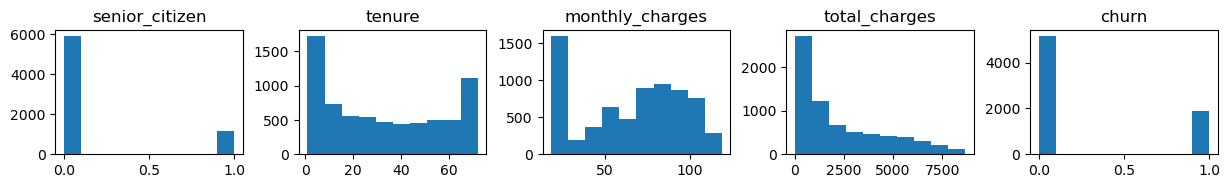

In [12]:
# Graficar la distribucion de columnas con variables continuas
df[['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'churn']].hist(figsize=(15, 10), grid=False, layout=(5, 5), bins=10)
plt.show()

In [13]:
import plotly.graph_objects as go
import plotly.subplots as sp

# Crear subplots para las diferentes variables
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=['tenure', 'monthly_charges', 'total_charges'])

# Agregar los boxplots a cada subplot
fig.add_trace(go.Box(y=df['tenure'], name='Tenure'), row=1, col=1)
fig.add_trace(go.Box(y=df['monthly_charges'], name='Monthly Charges'), row=1, col=2)
fig.add_trace(go.Box(y=df['total_charges'], name='Total Charges'), row=1, col=3)

# Actualizar el layout de la gráfica
fig.update_layout(title="Boxplots de las variables seleccionadas", height=600, width=1000)

# Mostrar la gráfica interactiva
fig.show()

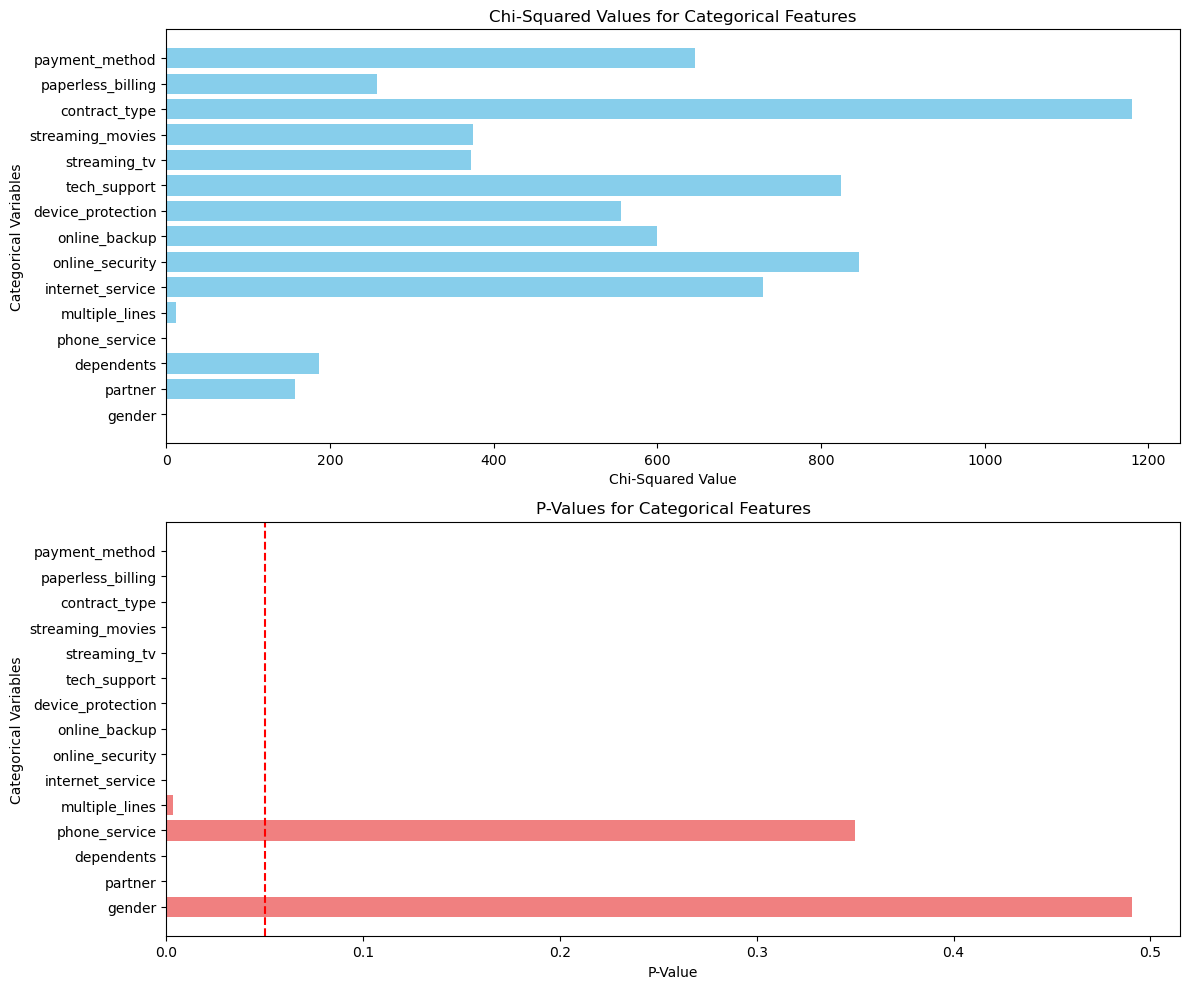

In [14]:
# Lista de columnas categóricas
categorical_columns = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service',
                       'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                       'streaming_movies', 'contract_type', 'paperless_billing', 'payment_method']

# Inicializar listas para almacenar los resultados
chi2_values = []
p_values = []

# Calcular chi2 y p-values para cada variable categórica
for feature in categorical_columns:
    chi2, p, _, _ = chi2_contingency(pd.crosstab(df[feature], df['churn']))
    chi2_values.append(chi2)
    p_values.append(p)

# Crear subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot de los valores de chi-cuadrado
axes[0].barh(categorical_columns, chi2_values, color='skyblue')
axes[0].set_title('Chi-Squared Values for Categorical Features')
axes[0].set_xlabel('Chi-Squared Value')
axes[0].set_ylabel('Categorical Variables')

# Plot de los p-values
axes[1].barh(categorical_columns, p_values, color='lightcoral')
axes[1].axvline(x=0.05, color='red', linestyle='--')  # Línea para el umbral de significancia (p < 0.05)
axes[1].set_title('P-Values for Categorical Features')
axes[1].set_xlabel('P-Value')
axes[1].set_ylabel('Categorical Variables')

# Ajustar el layout
plt.tight_layout()
plt.show()

__Conclusión__:

* __Variables relevantes__: Las variables con altos valores de chi-cuadrado y p-values menores a 0.05, como `contract_type`, `internet_service`, `online_security`, y `tech_support`, tienen una fuerte asociación con la probabilidad de que un cliente realice `Churn`.

* __Variables menos relevantes__: Variables como `gender`, `multiple_lines`, y `phone_service` tienen una relación débil con la variable objetivo, ya que tienen p-values mayores a 0.05, lo que indica que no son estadísticamente significativas para predecir `Churn`.

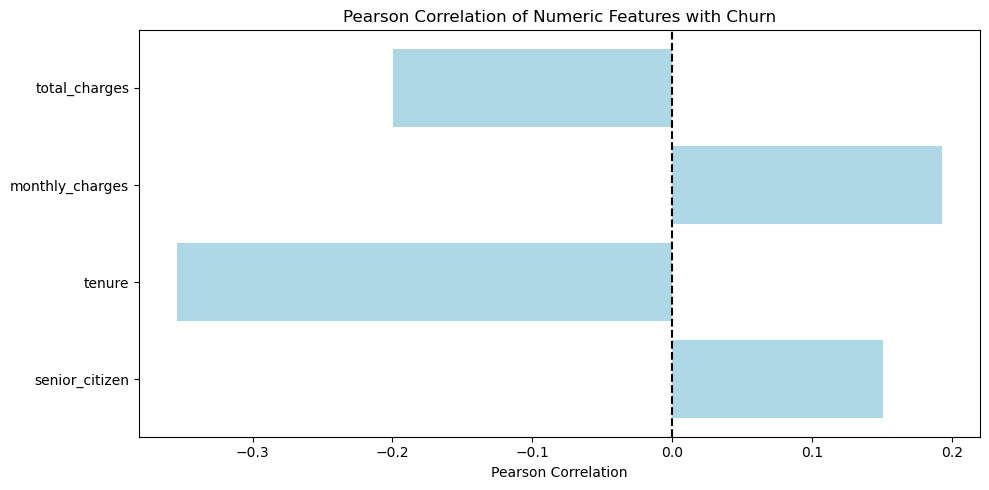

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Lista de columnas numéricas
numeric_columns = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']

# Inicializar listas para almacenar los resultados
correlations = []

# Calcular la correlación de Pearson para cada variable numérica
for feature in numeric_columns:
    corr, _ = pearsonr(df[feature], df['churn'])
    correlations.append(corr)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(numeric_columns, correlations, color='lightblue')
plt.xlabel('Pearson Correlation')
plt.title('Pearson Correlation of Numeric Features with Churn')
plt.axvline(x=0, color='black', linestyle='--')  # Línea en x = 0
plt.tight_layout()
plt.show()

__Conclusiones__:

* La variable `tenure` es una de las más importantes para predecir `churn`, ya que los clientes con mayor tiempo en el servicio tienden a quedarse.

* `monthly_charges` es una variable que muestra que los clientes que pagan más por mes tienen una mayor tendencia a irse.

* `total_charges` está algo correlacionada negativamente, lo que indica que los clientes con mayores cargos acumulados tienden a no realizar Churn.

## __5. Preprocesamiento y transformación de Datos__

La columna `customer_id` no aporta información relevante para construir modelos de machine learning, por lo que la eliminaremos.

In [16]:
# Eliminamos la columna customer_id
df.drop('customer_id', axis=1, inplace=True)

En el caso de un problema de predicción de churn en una empresa de telecomunicaciones, donde la mayoría de las variables categóricas no tienen un orden inherente (como el género, método de pago, servicio de internet, etc.), uno de los enfoques más acertados para variables categóricas es utilizar `Label Encoging` a través de la función `LabelEncoder()`.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas categóricas
categorical_columns = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service',
                       'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                       'streaming_movies', 'contract_type', 'paperless_billing', 'payment_method']

# Aplicar LabelEncoder solo a las columnas categóricas
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Ver las primeras filas del DataFrame actualizado
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Para las variables númericas utilizaremos `StandardScaler()`

In [18]:
from sklearn.preprocessing import StandardScaler

# Lista de columnas numéricas
numeric_columns = ['tenure', 'monthly_charges', 'total_charges']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar el StandardScaler solo a las columnas numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Mostrar las primeras filas del DataFrame escalado
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [19]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mostrar la matriz de correlación
corr_matrix

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
senior_citizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
phone_service,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
multiple_lines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
internet_service,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
online_security,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
online_backup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


In [20]:
# Obtener los valores de correlación para la variable 'churn'
corr_matrix['churn'].sort_values(ascending=False)

churn                1.000000
monthly_charges      0.192858
paperless_billing    0.191454
senior_citizen       0.150541
payment_method       0.107852
multiple_lines       0.038043
phone_service        0.011691
gender              -0.008545
streaming_tv        -0.036303
streaming_movies    -0.038802
internet_service    -0.047097
partner             -0.149982
dependents          -0.163128
device_protection   -0.177883
online_backup       -0.195290
total_charges       -0.199484
tech_support        -0.282232
online_security     -0.289050
tenure              -0.354049
contract_type       -0.396150
Name: churn, dtype: float64

#### Variables con mayor **correlación positiva** con `churn`:

1. **`monthly_charges` (0.193)**: Los clientes con **cargos mensuales más altos** tienden a tener una mayor probabilidad de abandono, lo que podría indicar que los costos elevados afectan negativamente la retención de clientes.

2. **`paperless_billing_Yes` (0.191)**: Los clientes que usan **facturación sin papel** tienen una mayor probabilidad de abandono, posiblemente relacionado con un perfil de clientes más jóvenes o menos comprometidos.

#### Variables con mayor **correlación negativa** con `churn`:

1. **`tenure` (-0.354)**: A medida que aumenta el **tiempo de permanencia** de un cliente, es menos probable que abandone el servicio. Esto refleja que los clientes más leales tienden a quedarse.

2. **`contract_type` (-0.396)**: Los clientes con **contratos extensos** tienen menos probabilidades de abandonar el servicio, lo que sugiere que los contratos a largo plazo ayudan a retener a los clientes.

## __6. Desarrollo de Modelos de Machine Learning__

Recordamos que las variables `gender`, `multiple_lines`, y `phone_service` tienen una relación débil con la variable objetivo por lo que las eliminaremos.

In [21]:
# Crear el nuevo conjunto de características (X) y variable objetivo (y)
X = df.drop(['gender', 'multiple_lines', 'phone_service', 'churn'], axis=1)
y = df['churn']

In [22]:
# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### __K Nearest Neighbors (KNN)__

In [23]:
# Definir el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar el rendimiento
print("Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))
print()
print(classification_report(y_test, y_pred_knn))

Accuracy (KNN): 0.7555081734186212

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1033
           1       0.54      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



#### __Arboles de Decisión__

In [24]:
# Definir el modelo
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dt_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = dt_model.predict(X_test)

# Evaluar el modelo
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Accuracy (Decision Tree): 0.720682302771855

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.72      1407



#### __Regresión Logística__

In [25]:
# Definir y entrenar el modelo de Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Evaluar el modelo
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Accuracy (Logistic Regression): 0.7846481876332623

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



#### __Random Forest__

In [26]:
# Definir y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print()
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.7917555081734187

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



##### __Ajuste de Hiperparametros__

Crearemos una funcion que nos permitirá evaluar modelos integrando varias métricas de interes.

In [27]:
from sklearn.metrics import confusion_matrix

def evaluate_model(model, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precision del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy del modelo: {accuracy:.2f}")
    print()

    # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusión')
    plt.show()

    # Mostrar el reporte de clasificación con métricas como precisión, recall y f1-score
    report=classification_report(y_test, y_pred)
    print("Reporte de Clasificación:")
    print(report)

#### __KNN__

In [28]:
# Optimización de hiperparámetros para KNN
param_grid = {'n_neighbors': [3, 5, 7, 10],
              'metric': ['euclidean', 'manhattan']}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_

# Mostrar los mejores hiperparametros
print("Mejores hiperparámetros (KNN):", grid_search_knn.best_params_)
print()

# Evaluar el modelo optimizado
y_pred_knn_optimized = grid_search_knn.predict(X_test)

Mejores hiperparámetros (KNN): {'metric': 'manhattan', 'n_neighbors': 10}



Accuracy del modelo: 0.78



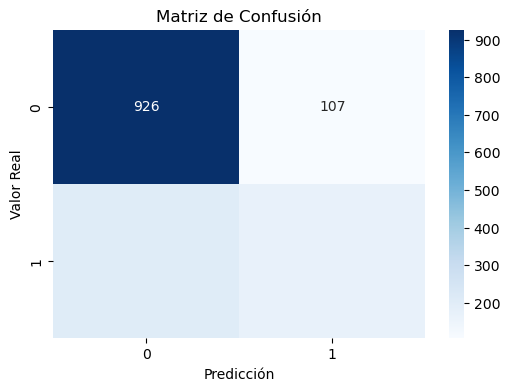

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.61      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [29]:
# Mostrar los resultados del modelo optimizado
evaluate_model(best_knn_model, X_test, y_test)

#### __Arboles de Decisión__

In [30]:
# Optimización de hiperparámetros para Árbol de Decisión
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros (DecisionTree):", grid_search_dt.best_params_)
print()

# Evaluar el modelo optimizado
y_pred_dt_optimized = grid_search_dt.predict(X_test)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores hiperparámetros (DecisionTree): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}



Accuracy del modelo: 0.79



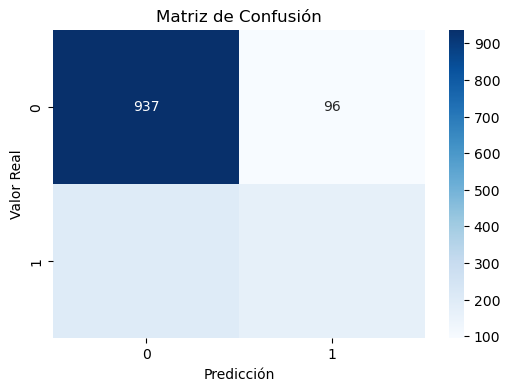

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [31]:
# Mostrar los resultados del modelo optimizado
evaluate_model(best_dt_model, X_test, y_test)

#### __Regresión Logística__

In [32]:
# Definir el modelo
log_model = LogisticRegression(max_iter=1000)

# Definir el grid de hiperparámetros
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Realizar la búsqueda de hiperparámetros
grid_search_log = GridSearchCV(estimator=log_model, param_grid=param_grid_log, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search_log.fit(X_train, y_train)
best_log_model = grid_search_log.best_estimator_

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros (Regresión Logística):", grid_search_log.best_params_)
print()

# Evaluar el modelo optimizado
y_pred_log_optimized = grid_search_log.predict(X_test)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros (Regresión Logística): {'C': 1, 'solver': 'liblinear'}



Accuracy del modelo: 0.79



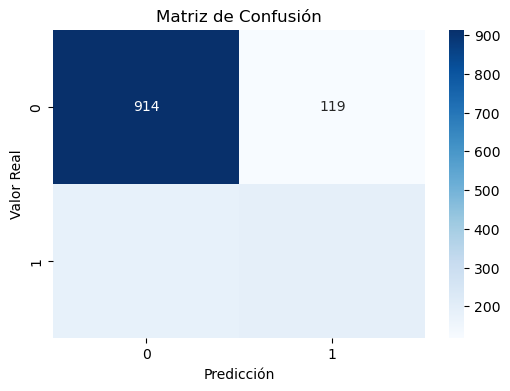

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [33]:
# Mostrar los resultados del modelo optimizado
evaluate_model(best_log_model, X_test, y_test)

#### __Random Forest__

In [34]:
# Definir el modelo
rf_model = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Realizar la búsqueda de hiperparámetros
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros (Random Forest):", grid_search_rf.best_params_)

# Evaluar el modelo optimizado
y_pred_rf_optimized = grid_search_rf.predict(X_test)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Mejores hiperparámetros (Random Forest): {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


Accuracy del modelo: 0.79



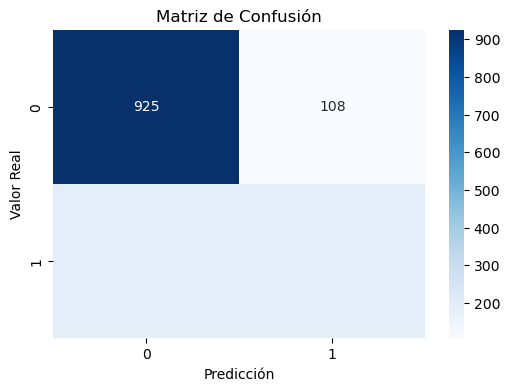

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [35]:
# Mostrar los resultados del modelo optimizado
evaluate_model(best_rf_model, X_test, y_test)

Consideraremos la variable `F1-Score` para determinar la calidad del modelo en terminos de un equilibrio entre precisión y recall para la variable objetivo.

In [36]:
# Realizar validación cruzada (cv=5) para cada modelo y obtener las puntuaciones F1
cv_scores_knn = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='f1')
cv_scores_dt = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='f1')
cv_scores_log = cross_val_score(best_log_model, X_train, y_train, cv=5, scoring='f1')
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='f1')

# Imprimir los resultados de la validación cruzada para cada modelo

print("F1-Score (KNN):", cv_scores_knn)
print("Media F1-Score (KNN):", cv_scores_knn.mean())

print("F1-Score (Decision Tree):", cv_scores_dt)
print("Media F1-Score (Decision Tree):", cv_scores_dt.mean())

print("F1-Score (Regresión Logística):", cv_scores_log)
print("Media F1-Score (Regresión Logística):", cv_scores_log.mean())

print("F1-Score (Random Forest):", cv_scores_rf)
print("Media F1-Score (Random Forest):", cv_scores_rf.mean())

F1-Score (KNN): [0.53696498 0.52751423 0.52059925 0.54033771 0.59047619]
Media F1-Score (KNN): 0.5431784729051474
F1-Score (Decision Tree): [0.52651515 0.57407407 0.54720617 0.50306748 0.62394604]
Media F1-Score (Decision Tree): 0.5549617826109143
F1-Score (Regresión Logística): [0.60869565 0.5904059  0.54612546 0.60465116 0.62254025]
Media F1-Score (Regresión Logística): 0.5944836861450982
F1-Score (Random Forest): [0.56561922 0.5962963  0.56088561 0.58545455 0.60853432]
Media F1-Score (Random Forest): 0.5833579994173712


Aunque `Random Forest` también ofrece un buen rendimiento, su `F1-Score promedio` es ligeramente inferior al de `Regresión Logística`. Si bien ambos son buenos candidatos, `Regresión Logística` sigue siendo la mejor opción si se busca optimizar el F1-Score para la clase minoritaria.

### __Análisis de los Modelos__

#### 1. **KNN**:

- **F1-score (Churn = 1)**: 0.52 (sin cambios después del ajuste de hiperparámetros).

- **Recall (Churn = 1)**: Disminuyó de 0.49 a 0.45 tras el ajuste, lo que indica que el modelo está capturando menos clientes que abandonan.

- **Precision (Churn = 1)**: Mejoró de 0.54 a 0.61, lo que indica que está haciendo predicciones más precisas, aunque identifica menos casos.

- **Accuracy**: Mejoró de 0.76 a 0.78.

#### 2. **Decision Tree**:

- **F1-score (Churn = 1)**: Mejoró ligeramente de 0.50 a 0.53 tras el ajuste de hiperparámetros.

- **Recall (Churn = 1)**: Disminuyó de 0.52 a 0.46, lo que significa que está capturando menos clientes que abandonan.

- **Precision (Churn = 1)**: Mejoró de 0.48 a 0.64, lo que indica que el modelo es más preciso en sus predicciones, pero captura menos casos.

- **Accuracy**: Mejoró de 0.72 a 0.79.

#### 3. **Logistic Regression**:

- **F1-score (Churn = 1)**: Se mantuvo en 0.56 tanto antes como después del ajuste de hiperparámetros.

- **Recall (Churn = 1)**: Se mantuvo en 0.51, lo que indica que el modelo tiene un buen equilibrio entre capturar los clientes que abandonan y evitar los falsos negativos.

- **Precision (Churn = 1)**: Mejoró ligeramente de 0.61 a 0.62, lo que sugiere que el modelo está haciendo predicciones más precisas.

- **Accuracy**: Mejoró ligeramente de 0.78 a 0.79.

#### 4. **Random Forest**:

- **F1-score (Churn = 1)**: Se mantuvo en 0.55 antes y después del ajuste de hiperparámetros.

- **Recall (Churn = 1)**: Se mantuvo en 0.49, lo que indica que está capturando casi la mitad de los clientes que abandonan.

- **Precision (Churn = 1)**: Empeoro de 0.64 a 0.63, lo que indica un ligero empeoramiento en la precisión.

- **Accuracy**: Se mantuvo en 0.79.

### __Conclusión__

De los cuatro modelos evaluados, **Logistic Regression** es el mejor modelo para predecir la clase minoritaria (clientes que abandonan), con un **F1-score** de **0.56** tanto antes como después del ajuste de hiperparámetros. Aunque otros modelos mejoraron su precisión, **Logistic Regression** mantiene un equilibrio entre **precision** (0.62) y **recall** (0.51), lo que lo convierte en el modelo más efectivo para capturar a los clientes que abandonan sin tener demasiados falsos positivos.

Por lo tanto, **Logistic Regression** es la opción más adecuada para predecir la fuga de clientes, ya que logra capturar de manera consistente a los clientes en riesgo, manteniendo un rendimiento balanceado en cuanto a precisión y recuperación.